# Задание 1 (6 баллов)

В данном задании мы будем работать со [списком 250 лучших фильмов IMDb](https://www.imdb.com/chart/top/?ref_=nv_mp_mv250)

1. Выведите топ-4 *фильма* **по количеству оценок пользователей** и **количество этих оценок** (1 балл)
2. Выведите топ-4 лучших *года* (**по среднему рейтингу фильмов в этом году**) и **средний рейтинг** (1 балл)
3. Постройте отсортированный **barplot**, где показано **количество фильмов** из списка **для каждого режисёра** (только для режиссёров с более чем 2 фильмами в списке) (1 балл)
4. Выведите топ-4 самых популярных *режиссёра* (**по общему числу людей оценивших их фильмы**) (2 балла)
5. Сохраните данные по всем 250 фильмам в виде таблицы с колонками (name, rank, year, rating, n_reviews, director) в любом формате (2 балла)

Использовать можно что-угодно, но полученные данные должны быть +- актуальными на момент сдачи задания

In [14]:
! pip install beautifulsoup4
! pip install lxml


[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: pip install --upgrade pip


In [15]:
import requests
from bs4 import BeautifulSoup

In [28]:
response = requests.get('https://www.imdb.com/chart/top/?ref_=nv_mp_mv250')

In [29]:
response.headers

{'Content-Type': 'text/html;charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Server': 'Server', 'Date': 'Sat, 15 Apr 2023 16:02:00 GMT', 'x-amz-rid': 'PVF22XGB4H9XJ9KFKASW', 'Set-Cookie': 'uu=eyJpZCI6InV1ODcxNTVjODUzNzFiNDIxMzg4NGMiLCJwcmVmZXJlbmNlcyI6eyJmaW5kX2luY2x1ZGVfYWR1bHQiOmZhbHNlfX0=; Domain=.imdb.com; Expires=Thu, 03-May-2091 19:16:07 GMT; Path=/; Secure, session-id=000-0000000-0000000; Domain=.imdb.com; Expires=Thu, 03-May-2091 19:16:07 GMT; Path=/; Secure, session-id-time=2312294520; Domain=.imdb.com; Expires=Thu, 03-May-2091 19:16:07 GMT; Path=/; Secure', 'X-Frame-Options': 'SAMEORIGIN', 'Content-Security-Policy': "frame-ancestors 'self' imdb.com *.imdb.com *.media-imdb.com withoutabox.com *.withoutabox.com amazon.com *.amazon.com amazon.co.uk *.amazon.co.uk amazon.de *.amazon.de translate.google.com images.google.com www.google.com www.google.co.uk search.aol.com bing.com www.bing.com", 'Content-Language': 'en-US', 'Strict-Transport-Security': '

In [30]:
my_soup = BeautifulSoup(response.content, "lxml")

In [32]:
my_soup.find_all("div")

[<div class="imdb-header__login-state-node" id="nblogin"></div>,
 <div class="ipc-page-content-container ipc-page-content-container--center navbar__inner" role="presentation"><label aria-disabled="false" aria-label="Open Navigation Drawer" class="ipc-responsive-button ipc-btn--theme-baseAlt ipc-responsive-button--transition-l ipc-btn--on-textPrimary ipc-responsive-button--single-padding sc-dIouRR eSXHLQ hamburger__icon" for="imdbHeader-navDrawer" id="imdbHeader-navDrawerOpen" role="button" tabindex="0"><svg class="ipc-icon ipc-icon--menu ipc-responsive-button__icon" fill="currentColor" height="24" id="iconContext-menu" role="presentation" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg"><path d="M0 0h24v24H0V0z" fill="none"></path><path d="M4 18h16c.55 0 1-.45 1-1s-.45-1-1-1H4c-.55 0-1 .45-1 1s.45 1 1 1zm0-5h16c.55 0 1-.45 1-1s-.45-1-1-1H4c-.55 0-1 .45-1 1s.45 1 1 1zM3 7c0 .55.45 1 1 1h16c.55 0 1-.45 1-1s-.45-1-1-1H4c-.55 0-1 .45-1 1z"></path></svg><span class="ipc-res

# Задание 2 (10 баллов)

Напишите декоратор `telegram_logger`, который будет логировать запуски декорируемых функций и отправлять сообщения в телеграм.


Вся информация про API телеграм ботов есть в официальной документации, начать изучение можно с [этой страницы](https://core.telegram.org/bots#how-do-bots-work) (разделы "How Do Bots Work?" и "How Do I Create a Bot?"), далее идите в [API reference](https://core.telegram.org/bots/api)

**Основной функционал:**
1. Декоратор должен принимать **один обязательный аргумент** &mdash; ваш **CHAT_ID** в телеграме. Как узнать свой **CHAT_ID** можно найти в интернете
2. В сообщении об успешно завершённой функции должны быть указаны её **имя** и **время выполнения**
3. В сообщении о функции, завершившейся с исключением, должно быть указано **имя функции**, **тип** и **текст ошибки**
4. Ключевые элементы сообщения должны быть выделены **как код** (см. скриншот), форматирование остальных элементов по вашему желанию
5. Время выполнения менее 1 дня отображается как `HH:MM:SS.μμμμμμ`, время выполнения более 1 дня как `DDD days, HH:MM:SS`. Писать форматирование самим не нужно, всё уже где-то сделано за вас

**Дополнительный функционал:**
1. К сообщению также должен быть прикреплён **файл**, содержащий всё, что декорируемая функция записывала в `stdout` и `stderr` во время выполнения. Имя файла это имя декорируемой функции с расширением `.log` (**+3 дополнительных балла**)
2. Реализовать предыдущий пункт, не создавая файлов на диске (**+2 дополнительных балла**)
3. Если функция ничего не печатает в `stdout` и `stderr` &mdash; отправлять файл не нужно

**Важные примечания:**
1. Ни в коем случае не храните свой API токен в коде и не загружайте его ни в каком виде свой в репозиторий. Сохраните его в **переменной окружения** `TG_API_TOKEN`, тогда его можно будет получить из кода при помощи `os.getenv("TG_API_TOKEN")`. Ручное создание переменных окружения может быть не очень удобным, поэтому можете воспользоваться функцией `load_dotenv` из модуля [dotenv](https://pypi.org/project/python-dotenv/). В доке всё написано, но если коротко, то нужно создать файл `.env` в текущей папке и записать туда `TG_API_TOKEN=<your_token>`, тогда вызов `load_dotenv()` создаст переменные окружения из всех переменных в файле. Это довольно часто используемый способ хранения ключей и прочих приватных данных
2. Функцию `long_lasting_function` из примера по понятным причинам запускать не нужно. Достаточно просто убедится, что большие временные интервалы правильно форматируются при отправке сообщения (как в примерах)
3. Допустима реализация логирования, когда логгер полностью перехватывает запись в `stdout` и `stderr` (то есть при выполнении функций печать происходит **только** в файл)
4. В реальной жизни вам не нужно использовать Telegram API при помощи ручных запросов, вместо этого стоит всегда использовать специальные библиотеки Python, реализующие Telegram API, они более высокоуровневые и удобные. В данном задании мы просто учимся работать с API при помощи написания велосипеда.
5. Обязательно прочтите часть конспекта лекции про API перед выполнением задания, так как мы довольно поверхностно затронули это на лекции

**Рекомендуемые к использованию модули:**
1. os
2. sys
3. io
4. datetime
5. requests
6. dotenv

**Запрещённые модули**:
1. Любые библиотеки, реализующие Telegram API в Python (*python-telegram-bot, Telethon, pyrogram, aiogram, telebot* и так далле...)
2. Библиотеки, занимающиеся "перехватыванием" данных из `stdout` и `stderr` (*pytest-capturelog, contextlib, logging*  и так далле...)



Результат запуска кода ниже должен быть примерно такой:

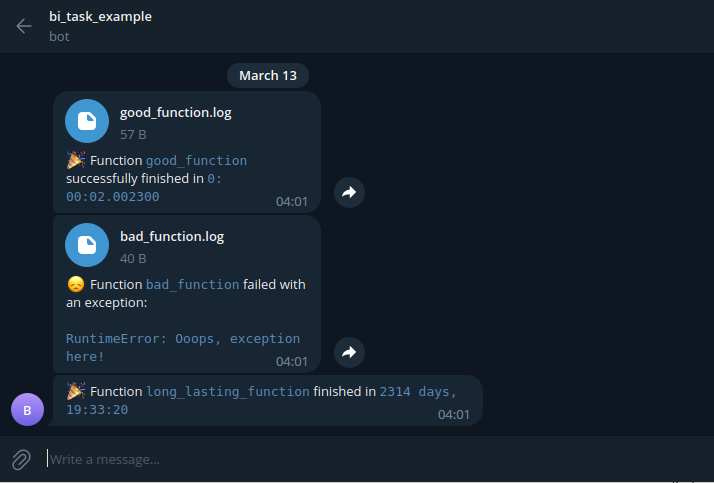

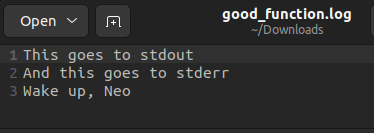

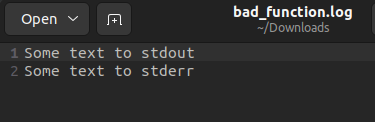

In [72]:
import sys
import time


def telegram_logger(chat_id):
    # Ваш код здесь


@telegram_logger(<your_chat_id>)
def good_function():
    print("This goes to stdout")
    print("And this goes to stderr", file=sys.stderr)
    time.sleep(2)
    print("Wake up, Neo")

@telegram_logger(<your_chat_id>)
def bad_function():
    print("Some text to stdout")
    time.sleep(2)
    print("Some text to stderr", file=sys.stderr)
    raise RuntimeError("Ooops, exception here!")
    print("This text follows exception and should not appear in logs")
    
@telegram_logger(<your_chat_id>)
def long_lasting_function():
    time.sleep(200000000)


good_function()

try:
    bad_function()
except Exception:
    pass

# long_lasting_function()

# Задание 3

В данном задании от вас потребуется сделать Python API для какого-либо сервиса

В задании предложено два варианта: простой и сложный, **выберите только один** из них.

Можно использовать только **модули стандартной библиотеки** и **requests**. Любые другие модули можно по согласованию с преподавателем.

❗❗❗ В **данном задании** требуется оформить код в виде отдельного модуля (как будто вы пишете свою библиотеку). Код в ноутбуке проверяться не будет ❗❗❗

## Вариант 1 (простой, 10 баллов)

В данном задании вам потребуется сделать Python API для сервиса http://hollywood.mit.edu/GENSCAN.html

Он способен находить и вырезать интроны в переданной нуклеотидной последовательности. Делает он это не очень хорошо, но это лучше, чем ничего. К тому же у него действительно нет публичного API.

Реализуйте следующую функцию:
`run_genscan(sequence=None, sequence_file=None, organism="Vertebrate", exon_cutoff=1.00, sequence_name="")` &mdash; выполняет запрос аналогичный заполнению формы на сайте. Принимает на вход все параметры, которые можно указать на сайте (кроме Print options). `sequence` &mdash; последовательность в виде строки или любого удобного вам типа данных, `sequence_file` &mdash; путь к файлу с последовательностью, который может быть загружен и использован вместо `sequence`. Функция должна будет возвращать объект типа `GenscanOutput`. Про него дальше.

Реализуйте **датакласс** `GenscanOutput`, у него должны быть следующие поля:
+ `status` &mdash; статус запроса
+ `cds_list` &mdash; список предсказанных белковых последовательностей с учётом сплайсинга (в самом конце результатов с сайта)
+ `intron_list` &mdash; список найденных интронов. Один интрон можно представить любым типом данных, но он должен хранить информацию о его порядковом номере, его начале и конце. Информацию о интронах можно получить из первой таблицы в результатах на сайте.
+ `exon_list` &mdash; всё аналогично интронам, но только с экзонами.

По желанию можно добавить любые данные, которые вы найдёте в результатах

In [ ]:
# Не пиши код здесь, сделай отдельный модуль

## Вариант 2 (очень сложный, 20 дополнительных баллов)

В этом варианте от вас потребуется сделать Python API для BLAST, а именно для конкретной вариации **tblastn** https://blast.ncbi.nlm.nih.gov/Blast.cgi?PROGRAM=tblastn&PAGE_TYPE=BlastSearch&LINK_LOC=blasthome

Хоть у BLAST и есть десктопное приложение, всё-таки есть одна область, где API может быть полезен. Если мы хотим искать последовательность в полногеномных сборках (WGS), а не в базах данных отдельных генов, у нас могут возникнуть проблемы. Так как если мы хотим пробластить нашу последовательность против большого количества геномов нам пришлось бы или вручную отправлять запросы на сайте, или скачивать все геномы и делать поиск локально. И тот и другой способы не очень удобны, поэтому круто было бы иметь способ сделать автоматический запрос, не заходя в браузер.

Необходимо написать функцию для запроса, которая будет принимать 3 обязательных аргумента: **белковая последовательность**, которую мы бластим, **базу данных** (в этом задании нас интересует только WGS, но по желанию можете добавить какую-нибудь ещё), **таксон**, у которого мы ищем последовательность, чаще всего &mdash; конкретный вид. По=желанию можете добавить также любые другие аргументы, соответствующие различным настройкам поиска на сайте. 

Функция дожна возвращать список объектов типа `Alignment`, у него должны быть следующие атрибуты (всё согласно результатам в браузере, удобно посмотреть на рисунке ниже), можно добавить что-нибудь своё:

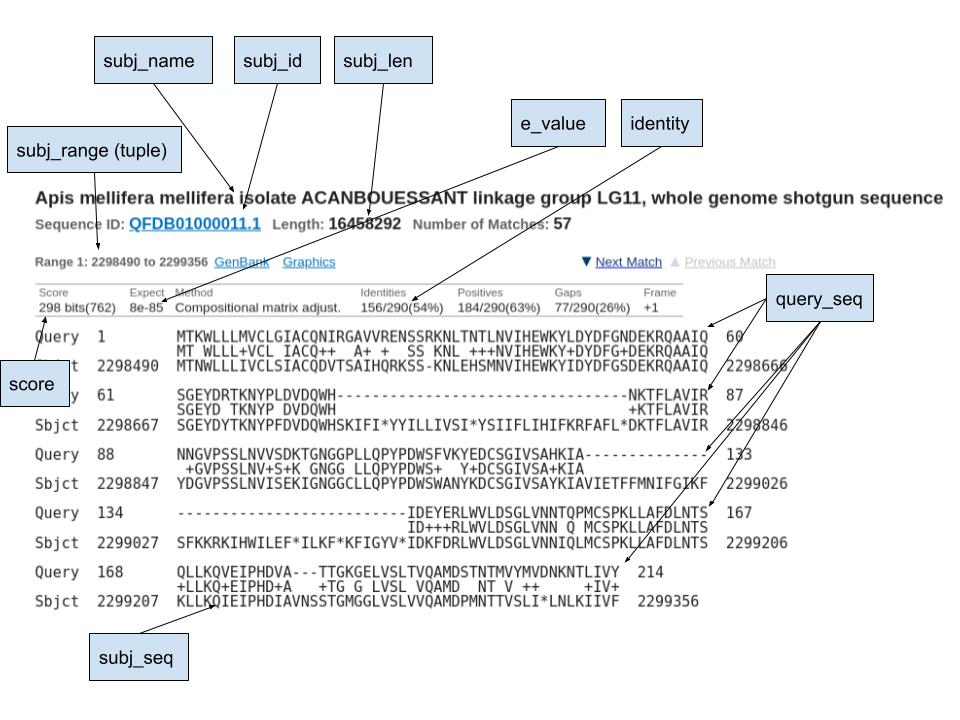


Самое сложное в задании - правильно сделать запрос. Для этого нужно очень глубоко погрузиться в то, что происходит при отправке запроса при помощи инструмента для разработчиков. Ещё одна проблема заключается в том, что BLAST не отдаёт результаты сразу, какое-то время ваш запрос обрабатывается, при этом изначальный запрос не перекидывает вас на страницу с результатами. Задание не такое простое как кажется из описания!

In [ ]:
# Не пиши код здесь, сделай отдельный модуль